<a href="https://colab.research.google.com/github/blue-within-blue-ice/machineLearning/blob/main/BT_3_Maszyna_wektor%C3%B3w_no%C5%9Bnych_(SVM)_i_nieco_wi%C4%99cej_o_optymalizatorach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Nauczanie maszynowe/Ćwiczenia3

# Maszyna wektorów nośnych (SVM)

In [2]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h4> Liniowe SVM

Cel: Rozdzielenie danych za pomocą hiperpłaszczyny (w podstawowej wersji na 2 grupy; można uogólnić)


- Chcemy zmaksymalizować marignes równy $\frac{2}{||w||}$ 

- W podstawowej wersji zadanie to sprowadza się do minimalizacji $J(w)=\frac{1}{2}||w||^2$ przy warunkach $y_i(w^Tx_i+w_0)\geq 1$

- W praktyce idealna separowalność liniowa nie zachodzi, musimy zatem dopuścić pewne niezgodnośći, wprowadzamy dodatkowe zmienne do rozwiązywanego problemu ($\eta_i$), który w tym momencie sprowadza się do minimalizacji $J(w)=\frac{1}{2}||w||^2+C\sum_{i}\eta_i$ przy warunkach $y_i(w^Tx_i+w_0)\geq 1 - \eta_i$

Uwaga:
- $\eta_i \in (0,1)$ to próbka jest po drobrej stronie ale wyszła poza margines
- $\eta_i>1$, to próbka jest po złej stronie

To nam narzuca interpretację $C$.Jaka ona jest?

In [3]:
#rozwazam dane iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

#standaryzacja
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1., random_state=0)
svm.fit(X_train_std, y_train);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


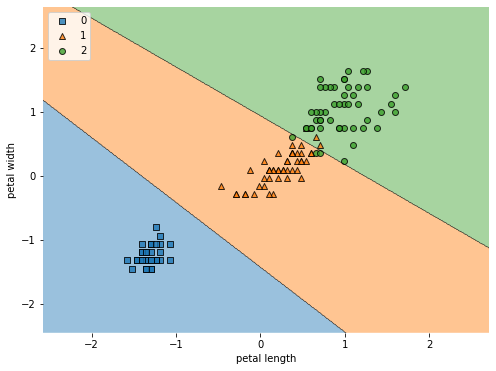

In [5]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [6]:
svm.score(X_test_std, y_test)

0.9777777777777777

<h4> Zadanie1: Rozważ poniższe dane. Zastosuj algorytm SVM dla różnych parametrów C: 0.01, 10. Zwizualizuj i skomentuj w kilku zdaniach otzymane wyniki.

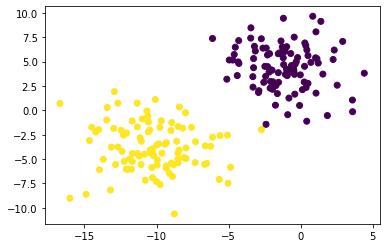

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X_train_std, y_train);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


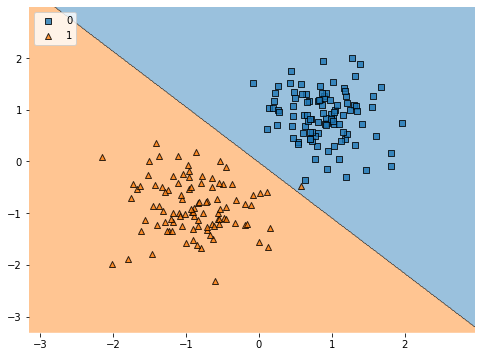

In [22]:
plt.figure(figsize=(8, 6))

X_all = np.vstack((X_train_std, X_test_std))
y_all = np.hstack((y_train, y_test))
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.legend(loc='upper left')
plt.show()

Dla małego C algorytm zachowuje spory margines, przez co pojedynczy punkt znalazł się po złej jego stronie. Sama granica przebiega oddziela po równo zbiorowiska punktów, co wynika z tego, że człon 1/2 *||w||^2 dominuje.

In [23]:
svm = SVC(kernel='linear', C=10, random_state=0)
svm.fit(X_train_std, y_train);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


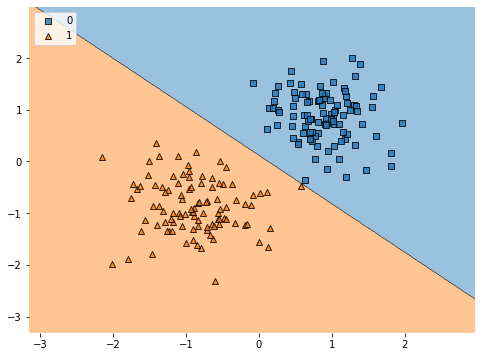

In [24]:
plt.figure(figsize=(8, 6))

X_all = np.vstack((X_train_std, X_test_std))
y_all = np.hstack((y_train, y_test))
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.legend(loc='upper left')
plt.show()

Dla dużej wartości C, współczynnik η ma przeważające znaczenie, przez co algorytm stara się jak najdokładniej rozdzielić punkty. Widać, że dwa punkty leżą zaraz przy granicy.

<h4> Kernel

Dane często nie są separowalne liniowo, jednak klasyfiaktory liniowe dalej mogą działać! Wystarczy zastosować odpowiednie przekształcenie danych (kernel)

Przykładowa funkcja, jedna z najczęsciej używanych to RBF, zdefiniowana jest jako $K(x,y) = -\exp(-\frac{1}{2\sigma^2} ||x-y||^2)= \exp(-\gamma ||x-y||^2)$

Inne: wielomianowy, sigmoidalny,...

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


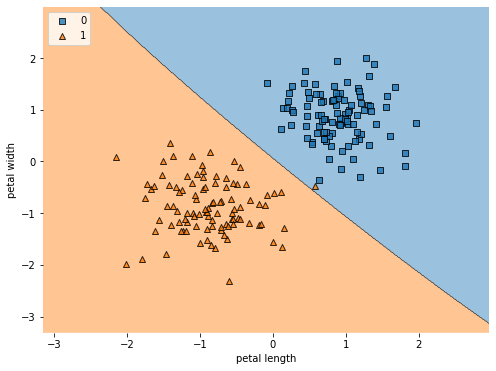

In [25]:
svm = SVC(kernel='rbf', C=1., gamma=0.1, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

<h4> Zadanie2: Przetestować inne wartości $\gamma$ (np. 10, 50) dla danych wyżej. Skomentować wyniki w konkteście definicji parametru $\gamma$.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


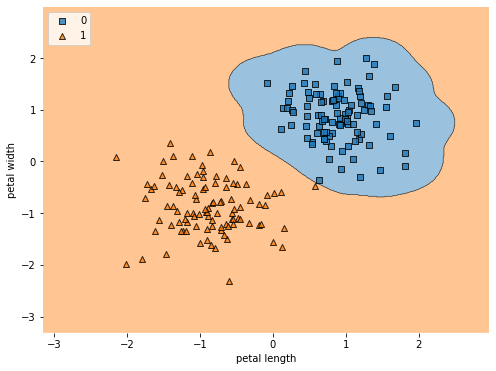

In [26]:
svm = SVC(kernel='rbf', C=1., gamma=10, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


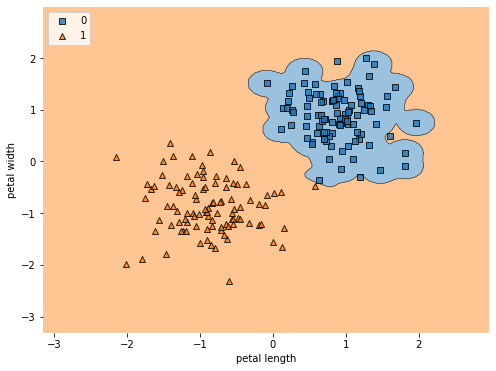

In [27]:
svm = SVC(kernel='rbf', C=1., gamma=50, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Parametr γ decyduje o stopniu wariancji funkcji Gaussa. Dla małych γ, wariancja jest duża, a więc pole jest bardziej ogólne. Dla dużych γ, wariancja jest małą pole wokół danego punktu jest mniejsze. Podobieństwo mierzone jest na podstawie bliskości między punktami.

<h3> Rozpoznawanie twarzy

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names) #jakie osoby tam są?
print()
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

(1348, 62, 47)


Każde zdjęcie jest wymiaru $62 \times 47$, czyli $2914$ pikseli. To dużo... Zastosujemy PCA (o PCA będzie więcej w przyszłości, na tę chwile wystarczy widzieć, że efektem będzie zredukowana liczba zmiennych)

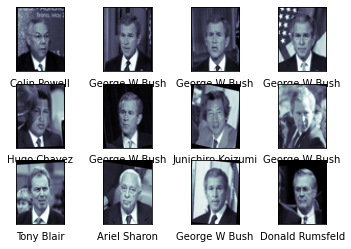

In [ ]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks = [], yticks = [],
           xlabel = faces.target_names[faces.target[i]])

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = "rbf", random_state = 0)
model = Pipeline([('pca', pca), ('svc',svc)])

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

param_grid = {"svc__C": [1, 5, 10, 50],
              "svc__gamma": [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
grid = grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [ ]:
grid.score(X_test, y_test)

0.7654320987654321

In [ ]:
m = grid.best_estimator_
yfit = m.predict(X_test)

In [ ]:
m

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, gamma=0.005, random_state=0))])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.71      0.77        17
     Colin Powell       0.85      0.79      0.81        84
  Donald Rumsfeld       0.69      0.56      0.62        36
    George W Bush       0.72      0.97      0.82       146
Gerhard Schroeder       0.72      0.64      0.68        28
      Hugo Chavez       0.80      0.30      0.43        27
Junichiro Koizumi       1.00      0.81      0.90        16
       Tony Blair       0.80      0.63      0.70        51

         accuracy                           0.77       405
        macro avg       0.80      0.67      0.72       405
     weighted avg       0.78      0.77      0.75       405



# Uzupełnienie

<h3> Pipeliny + Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
gs = gs.fit(X_train, y_train) #uczymy na zbiorze treninogwym, mozna by jeszcze wydzielic zbior walidacyjny (jakby bylo wiecej danych)

In [ ]:
print(gs.best_score_, gs.best_params_, gs.score(X_test, y_test))

0.9527272727272728 {'clf__C': 0.1, 'clf__kernel': 'linear'} 0.9555555555555556


<h3> Krosswalidacja

In [ ]:
"""
###K-fold --> dane są dzielone na k podzbiorow, kazdy z nich bierze sie jako zbior testowy (a pozostale treningowe),
           efektem jest k wynikow ktore pozniej się usrednia
           
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = k_folds)  #clf = metoda, np DecisionTreeClassifier()



###Stratified K-Fold --> dzielimy na zbior uczący i testowy tak zeby byly zachowane proporcje pomiedzy klasami decyzyjnymi
                         (zwlaszcza wazne gdy są duze dysproporcje w danych)

from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = sk_folds)



###Leave-One-Out (LOO) --> jak K-fold, tyle ze 1 podzbior to jedna dana, liczba krosswalidacji = liczba obserwacji,
                        często dla malych danych

from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(clf, X, y, cv = loo)



###Leave-P-Out (LPO)  --> to co wyzej, z tym ze mozemy dobrac parametr p na zbiorze walidacyjnym

from sklearn.model_selection import LeavePOut, cross_val_score
lpo = LeavePOut(p=2)
scores = cross_val_score(clf, X, y, cv = lpo)




###Shuffle Split --> pomija pewien procent danych

from sklearn.model_selection import ShuffleSplit, cross_val_score
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(clf, X, y, cv = ss)
"""

'\n###K-fold --> dane są dzielone na k podzbiorow, kazdy z nich bierze sie jako zbior testowy (a pozostale treningowe),\n           efektem jest k wynikow ktore pozniej się usrednia\n           \nfrom sklearn.model_selection import KFold, cross_val_score\nk_folds = KFold(n_splits = 5)\nscores = cross_val_score(clf, X, y, cv = k_folds)  #clf = metoda, np DecisionTreeClassifier()\n\n\n\n###Stratified K-Fold --> dzielimy na zbior uczący i testowy tak zeby byly zachowane proporcje pomiedzy klasami decyzyjnymi\n                         (zwlaszcza wazne gdy są duze dysproporcje w danych)\n\nfrom sklearn.model_selection import StratifiedKFold, cross_val_score\nsk_folds = StratifiedKFold(n_splits = 5)\nscores = cross_val_score(clf, X, y, cv = sk_folds)\n\n\n\n###Leave-One-Out (LOO) --> jak K-fold, tyle ze 1 podzbior to jedna dana, liczba krosswalidacji = liczba obserwacji,\n                        często dla malych danych\n\nfrom sklearn.model_selection import LeaveOneOut, cross_val_score\nloo

<h3> Optymalizatory

Jak widzieliśmy na poprzednich i tych zajęciach, różne metody często wykorzystują różne funkcje kosztu. W tym podrozdziale zaimplementujemy w pytorch różne metody optymalizacji, zaczynając już od znanej metody spadku gradientu. Poniższe materiały pochodzą od grupy pracowników WMiI.

Warto poczytać: https://ruder.io/optimizing-gradient-descent/index.html

In [2]:
import torch

In [4]:
from utils import visualize_optimizer
from checker import test_optimizer

Definiujemy klasę rodzic dla kolejnych metod.

In [38]:
from typing import List

class Optimizer:
    """Base class for each optimizer"""
    
    def __init__(self, initial_params):
        # store model weights
        self.params = initial_params
    
    def step(self):
        """Updates the weights stored in self.params"""
        raise NotImplementedError()
         
    def zero_grad(self):
        """Torch accumulates gradients, so we need to clear them after every update"""
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

    def gen_zero_tensor(self):
        return [torch.zeros_like(param) for param in self.params]  # torch function that returns tensor filled with the scalar value 0 with the same size as input

### Metoda spadku gradientu

<font size="+2"> $$\theta_{t+1} = \theta_t - \eta \nabla_\theta \mathcal{L}(\theta_t)$$  </font><br>

In [6]:
class GradientDescent(Optimizer):
    
    def __init__(self, initial_params: List[torch.tensor], learning_rate):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
    
    @torch.no_grad()
    def step(self):
        for param in self.params:
            # Please note that it's important to change the parameters in-place (-=) so the original tensors are modified
            param -= self.learning_rate * param.grad

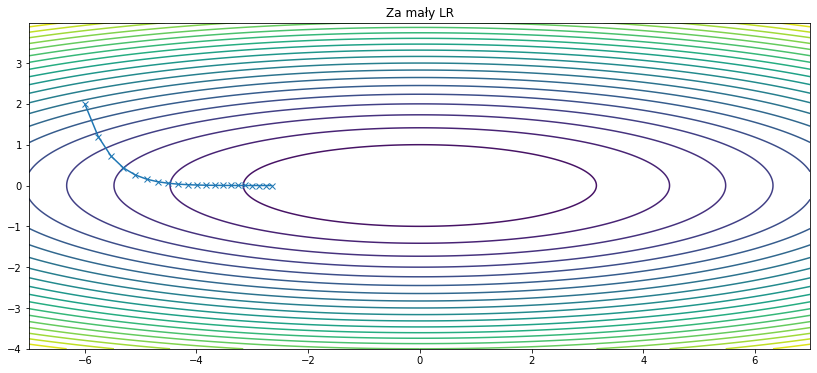

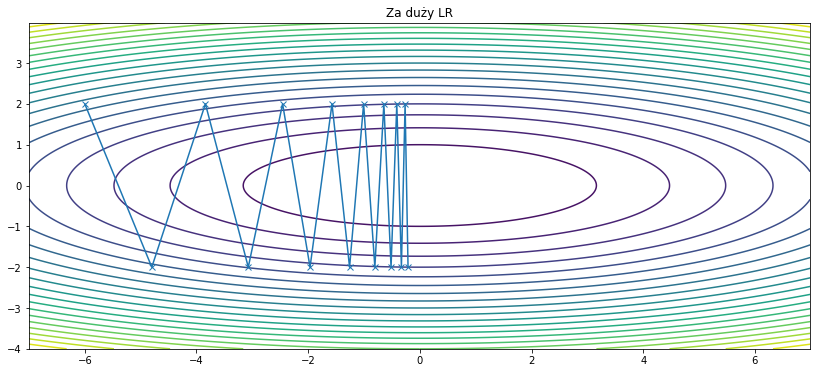

In [7]:
visualize_optimizer(GradientDescent, n_steps=20, learning_rate=0.1, title='Za mały LR')
visualize_optimizer(GradientDescent, n_steps=15, learning_rate=0.5, title='Za duży LR')

### Momentum
Hiperparametry:
* $\eta$ - Learning Rate (typowe wartości: od 0.001 do 0.01)
* $\gamma$ - Momentum (zawsze < 1, typowo 0.9)

Zmiany dokonywane są na podstawie wektora "pędu" (ang. *momentum*) $\Delta$, który rośnie jeżeli dokonujemy zmian w tym samym kierunku.

<font size="+2"> $$ \Delta_{t+1} = \gamma  \Delta_{t} + \eta \nabla_\theta \mathcal{L}(\theta_t) $$ </font><br>
<font size="+2"> $$ \theta_{t+1} = \theta_{t} - \Delta_{t+1} $$ </font>

#### Uwagi
* $\Delta_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.

<h4> Zadanie3: Uzupełnij definicję poniżej klasy.

In [39]:
class Momentum(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        
        self.learning_rate = learning_rate
        self.gamma = gamma
        
        self.deltas = self.gen_zero_tensor()
              
    @torch.no_grad()
    def step(self):
        args = zip(self.params, self.deltas)
        
        for param, delta in args:
            delta *= self.gamma
            delta += self.learning_rate * param.grad
            param -= delta

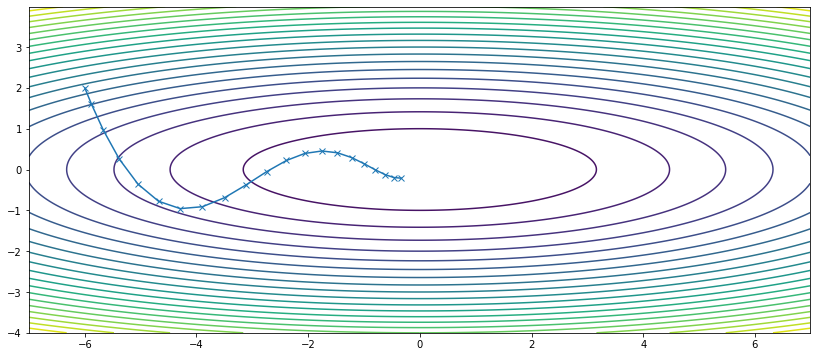

In [40]:
visualize_optimizer(Momentum, n_steps=20, learning_rate=0.05, gamma=0.8)

### Adagrad  
Hiperparametry:
* $\eta$ - Learning Rate (typowe wartości: od 0.001 do 0.01)
* $\epsilon$ - Dodawany do mianownika w celu uniknięcia dzielenia przez 0 (typowo $10^{-8}$)

W każdym korku adaptujemy stałą uczenia $\eta$ dla każdego z wymiarów wag na podstawie sumy kwadratów dotychczasowych gradientów.

<font size="+2"> $$ \displaystyle  G_t = \sum_{i = 1}^{t} \big(\nabla_\theta \mathcal{L}(\theta_i)\big)^2 $$ </font>

<font size="+2"> $$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \odot \nabla_\theta \mathcal{L}(\theta_t) $$ </font>



<font size="+0"> gdzie $G_t$ to suma kwadratów gradientów $\nabla_\theta \mathcal{L}(\theta_i)^2$ dla kroków $i = 1, .., t$ </font>

##### Uwagi
* $G_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $\odot$ to mnożenie *element-wise*.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.

<h4> Zadanie4: Uzupełnij definicję poniżej klasy.

In [41]:
class Adagrad(Optimizer):
    
    def __init__(self, initial_params, learning_rate, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        
        self.gs = self.gen_zero_tensor()
    
    @torch.no_grad()
    def step(self):
        args = zip(self.params, self.gs)
        
        # torch has same methods as pd for calculating pow and sqrt
        for param, g in args:
            g += torch.pow(param.grad, 2)
            param -= (self.learning_rate / torch.sqrt(g + self.epsilon)) * param.grad

In [42]:
test_optimizer(Adagrad)

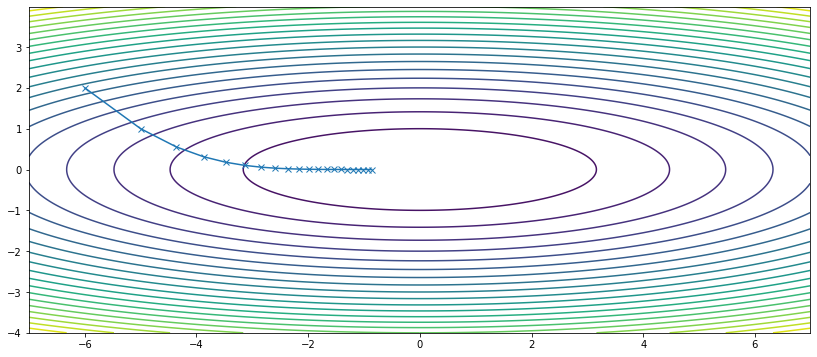

In [43]:
visualize_optimizer(Adagrad, n_steps=20, learning_rate=1.0, epsilon=1e-8)

### RMSProp  
Hiperparametry:
* $\eta$ - Learning Rate (typowe wartości: od 0.001 do 0.01)
* $\gamma$ - Współczynnik średniej kroczącej (typowo 0.9)
* $\epsilon$ - Dodawany do mianownika w celu uniknięcia dzielenia przez 0 (typowo $10^{-8}$)

Analogicznie dla algorytmu *Adagrad* adaptujemy stałą uczenia, lecz tym razem zamiast sumy, robimy to średnią kroczącą ze współczynnikiem $\gamma$.

<font size="+2"> $$ H_{t+1} = \gamma H_{t} + (1 - \gamma) \big( \nabla_\theta \mathcal{L}(\theta_t)\big)^2 $$ </font>

<font size="+2"> $$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{H_{t+1} + \epsilon}} \odot \nabla_\theta \mathcal{L}(\theta_t) $$ </font>



gdzie $H_t$ to średnia krocząca kwadratów gradientów $(\nabla_\theta \mathcal{L}(\theta_t))^2$ z kroków $0, 1, ..., t$ ze współczynnikiem $\gamma$.

#### Uwagi
* $H_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $\odot$ to mnożenie *element-wise*.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.

<h4> Zadanie5: Uzupełnij definicję poniżej klasy.

In [44]:
class RMSProp(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        
        self.hs = self.gen_zero_tensor()
        
    @torch.no_grad()
    def step(self):
        args = zip(self.params, self.hs)
        
        for param, h in args:
            h *= self.gamma
            h += (1 - self.gamma) * torch.pow(param.grad, 2)
            param -= (self.learning_rate / torch.sqrt(h + self.epsilon)) * param.grad

In [45]:
test_optimizer(RMSProp)

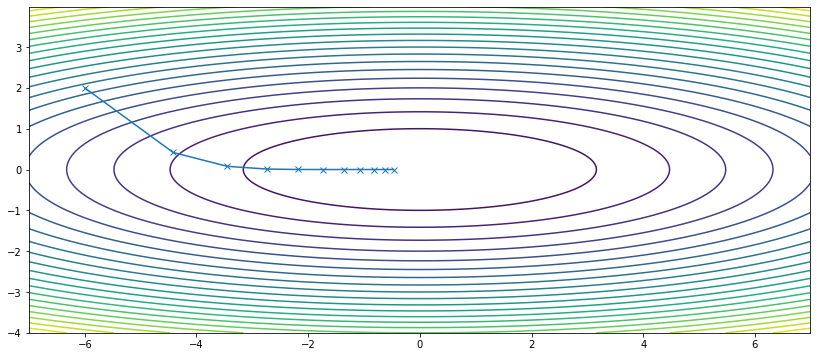

In [46]:
visualize_optimizer(RMSProp, n_steps=10, learning_rate=0.5, gamma=0.9, epsilon=1e-8)

### Adadelta  
Hiperparametry:
* $\gamma$ - Współczynnik średniej kroczącej (typowo 0.9)
* $\epsilon$ - Dodawany do mianownika w celu uniknięcia dzielenia przez 0 oraz rozpoczęcia uczenia (typowo $10^{-8}$ do $10^{-2}$)

Eliminujemy stałą uczenia $\eta$ i sprawiamy, że "prędkość" poprawek jest podobna do faktycznych poprawek uzależniając krok uczenia od średniej kroczącej poprzednich poprawek.

<font size="+2"> $$ H_{t+1} = \gamma H_{t} + (1 - \gamma) \big( \nabla_\theta \mathcal{L}(\theta_t)\big)^2 $$ </font>

<font size="+2"> $$ \Delta_{t+1} = \frac{\sqrt{D_{t} + \epsilon}}{\sqrt{H_{t+1} + \epsilon}} \odot \nabla_\theta \mathcal{L}(\theta_t) $$ </font>

<font size="+2"> $$ \theta_{t+1} = \theta_t - \Delta_{t+1} $$ </font>

<font size="+2"> $$ D_{t+1} = \gamma D_{t} + (1 - \gamma) \Delta_{t+1}^2 $$ </font>

#### Uwagi:
* $H_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $D_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $\odot$ to mnożenie *element-wise*.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.

<h4> Zadanie6: Uzupełnij definicję poniżej klasy.

In [47]:
class Adadelta(Optimizer):
    def __init__(self, initial_params, gamma, epsilon):
        super().__init__(initial_params)
        self.gamma = gamma
        self.epsilon = epsilon

        self.hs = self.gen_zero_tensor()
        self.ds = self.gen_zero_tensor()
        
    @torch.no_grad()
    def step(self):
        args = zip(self.params, self.hs, self.ds)

        for param, h, d in args:
            h *= self.gamma
            h += (1 - self.gamma) * torch.pow(param.grad, 2)
            dt = (torch.sqrt(d + self.epsilon) / torch.sqrt(h + self.epsilon)) * param.grad
            param -= dt
            d *= self.gamma
            d += (1 - self.gamma) * torch.pow(dt, 2)

In [48]:
test_optimizer(Adadelta)

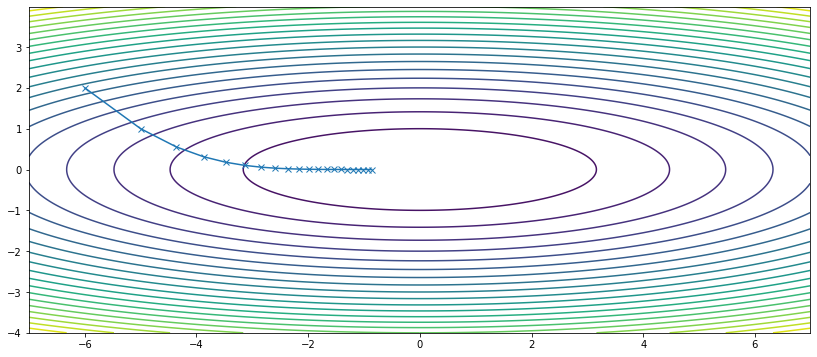

In [49]:
visualize_optimizer(Adagrad, n_steps=20, learning_rate=1.0, epsilon=1e-8)

### Adam 

Hiperparametry:
* $\eta$ - Learning Rate (typowo 0.001)
* $\beta_1$ - współczynnik średniej kroczącej pierwszego momentu (typowo 0.9)
* $\beta_2$ - współczynnik średniej kroczącej drugiego momentu (typowo 0.999)
* $\epsilon$ - zapobiega dzieleniu przez zero (typowo $10^{-8}$)

Adaptujemy gradient dwiema średnimi kroczącymi, pierwszego $m$ i drugiego $v$ momentu. Na początku uczenia te średnie są bardzo zbiasowane do 0, stąd wprowadzane są poprawka $\hat{m}$ i $\hat{v}$, im dalej w procesie uczenia, tym te poprawki wprowadzają mniejsze zmiany.  

<font size="+2"> $$ m_{t+1} = \beta_1 m_{t} + (1 - \beta_1)  \nabla_\theta \mathcal{L}(\theta_t) $$ </font>
<font size="+2"> $$ v_{t+1} = \beta_2 v_{t} + (1 - \beta_2)  \big( \nabla_\theta \mathcal{L}(\theta_t) \big)^2 $$ </font>
<br>
<font size="+2"> $$  \hat{m} = \frac{m_{t+1}}{1 - \beta_1^{(t+1)}} $$ </font><br>
<font size="+2"> $$  \hat{v} = \frac{v_{t+1}}{1 - \beta_2^{(t+1)}} $$ </font>
<br>
<font size="+2"> $$ \theta_{t+1} = \theta_t - \eta \frac{\hat{m}}{\sqrt{\hat{v}} + \epsilon} $$ </font>

#### Uwagi
* $m_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $v_0 = \mathbf{0}$, wymiar taki sam jak $\theta$. 
* $\beta_1^{(t+1)}$ oraz $\beta_2^{(t+1)}$ to potęgowania.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.


<h4> Zadanie7: Uzupełnij definicję poniżej klasy.

In [50]:
class Adam(Optimizer):
   
    def __init__(self, initial_params, learning_rate, beta1, beta2, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        
        self.ms = self.gen_zero_tensor()
        self.vs = self.gen_zero_tensor()
        self.t = int()  # iterator that starts with 0



        
    @torch.no_grad()
    def step(self,):
        args = zip(self.params, self.ms, self.vs)

        for param, m, v in args:
            m *= self.beta1
            m += (1 - self.beta1) * param.grad
            v *= self.beta2
            v += (1 - self.beta2) * torch.pow(param.grad, 2)
            m_correction = m / (1 - self.beta1**(self.t + 1))
            v_correction = v / (1 - self.beta2**(self.t + 1))
            param -= self.learning_rate * (m_correction / (torch.sqrt(v_correction) + self.epsilon))
    
        self.t += 1


In [51]:
test_optimizer(Adam)

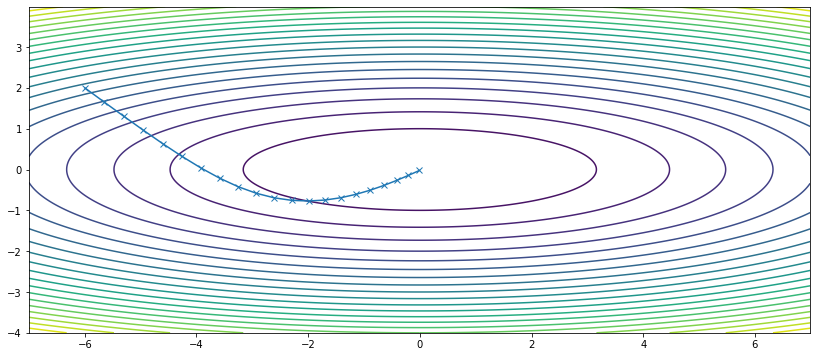

In [52]:
visualize_optimizer(Adam, n_steps=20, learning_rate=0.35, beta1=0.9, beta2=0.999, epsilon=1e-8)

In [ ]:
#Operacje na tensorach
x = torch.tensor([4, 9])
print(torch.sqrt(x)) #pierwiastki
print()
print(torch.pow(x, 2)) #potęgi